# Multinomial Logistic Regression Forecasting Model

### Steps:
1. **Dataset Information Gathering**
   - Explore the dataset and understand the available features.
   - Identify potential target and predictor variables for the model.
   - Check for missing values, data types, and overall structure.

2. **Data Cleaning**
     - Handle missing values
     - Encode categorical variables into numeric format where necessary (e.g., gender, race).
     - Normalize or scale features if required.

3. **Data Visualization**
   - Visualize relationships between predictors and the target variable.
   - Use histograms, box plots, and scatter plots to understand distributions.
   - Correlation heatmaps to check for multi collinearity.

4. **TensorFlow Model Training**
   - **Multinomial Logistic Regression Forecasting Model**:
     - Split the data into training and testing sets.
     - Build and compile a neural network model for multinomial logistic regression using TensorFlow.
     - Train the model on the training set.
5. **Evaluation and Scoring**
   - Evaluate the model on the test set and visualize the results.
       
   
### Goal
The objective of this project is to develop a Multinomial Logistic Regression model that predicts a person's vision status (Normal Vision, Visual Impairment, Blindness) based on demographic and health-related factors

**Example**:
#### **Input:**
| Age  | Gender | RiskFactor (Diabetes) | RiskFactor (Smoking) | RiskFactorResponse (Hypertension) |
|------|--------|-----------------------|----------------------|-----------------------------------|
| 50   | Male   | Yes                   | No                   | Yes                               |

#### **Output (Vision Status Prediction)**:
| Vision Status | Probability   |
|---------------|---------------|
| Normal vision | 0.60          |
| Visual impairment | 0.25      |
| Blindness     | 0.15          |


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/National_Health_and_Nutrition_Examination_Survey_Vision_and_Eye_Health_Surveillance.csv", low_memory=True)

### Make a rough overview of all the Data

In [54]:
df.describe()

,YearStart,YearEnd,Data_Value,Low_Confidence_limit,High_Confidence_Limit,Numerator,Sample_Size,LocationID,DataValueTypeID,GeoLocation,Geographic Level
count,10320.000000,10320.0,6328.000000,6328.000000,6328.000000,0.0,8639.000000,10320.0,0.0,0.0,0.0
mean,2001.162791,2008.0,23.670702,20.277276,27.117668,NaN,1236.882278,59.0,NaN,NaN,NaN
std,2.880952,0.0,31.245569,30.055377,32.022886,NaN,2400.059894,0.0,NaN,NaN,NaN
min,1999.000000,2008.0,0.000000,0.000000,0.000000,NaN,30.000000,59.0,NaN,NaN,NaN
25%,1999.000000,2008.0,3.400000,2.200000,4.800000,NaN,155.000000,59.0,NaN,NaN,NaN
50%,1999.000000,2008.0,10.800000,7.700000,14.100000,NaN,453.000000,59.0,NaN,NaN,NaN
75%,2005.000000,2008.0,25.000000,17.700000,33.100000,NaN,1265.500000,59.0,NaN,NaN,NaN
max,2005.000000,2008.0,100.000000,99.300000,100.000000,NaN,35090.000000,59.0,NaN,NaN,NaN


### List of all Rows and there DataType

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   10320 non-null  int64  
 1   YearEnd                     10320 non-null  int64  
 2   LocationAbbr                10320 non-null  object 
 3   LocationDesc                10320 non-null  object 
 4   DataSource                  10320 non-null  object 
 5   Topic                       10320 non-null  object 
 6   Category                    10320 non-null  object 
 7   Question                    10320 non-null  object 
 8   Response                    10320 non-null  object 
 9   Age                         10320 non-null  object 
 10  Gender                      10320 non-null  object 
 11  RaceEthnicity               10320 non-null  object 
 12  RiskFactor                  10320 non-null  object 
 13  RiskFactorResponse          103

### List of First 5 Rows

In [56]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Category,Question,Response,Age,...,QuestionID,ResponseID,DataValueTypeID,AgeID,GenderID,RaceEthnicityID,RiskFactorID,RiskFactorResponseID,GeoLocation,Geographic Level
0,2005,2008,US,National,NHANES,Visual Function,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,All ages,...,NHBL,RYES,NaN,AGEALL,GF,ALLRACE,RFDM,RFNO,NaN,NaN
1,1999,2008,US,National,NHANES,Visual Function,Measured Visual Acuity,Best-corrected visual acuity,Visual impairment,40-64 years,...,QVISA,RVIMP,NaN,AGE4064,GALL,OTH,RFSM,RFYES,NaN,NaN
2,1999,2008,US,National,NHANES,Visual Function,Measured Visual Acuity,Best-corrected visual acuity,US-defined blindness,12-17 years,...,QVISA,RVUSB,NaN,AGE1217,GM,OTH,RFDM,RFNO,NaN,NaN
3,2005,2008,US,National,NHANES,Visual Function,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,All ages,...,NHBL,RYES,NaN,AGEALL,GF,OTH,RFDM,RFYES,NaN,NaN
4,2005,2008,US,National,NHANES,Visual Function,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,18-39 years,...,NHBL,RYES,NaN,AGE1839,GF,BLK,RFDM,RFNO,NaN,NaN


### Percentage of Values that are Null

In [57]:
round(df.isnull().sum().sum() / df.count().sum(), 3)

0.222

### Check for Duplicate values

In [58]:
df.duplicated().sum()

0

### Data Cleaning 

**Rows to remove for Multinomial Logistic Regression to predicting vision status**
- YearStart
- YearEnd
- LocationDesc
- DataSource
- TopicType
- Data_Value_Unit
- DataValueTypeID
- Data_Value_Alt
- GeoLocation
- LowConfidenceLimit
- HighConfidenceLimit
- Sample_Size
- Data_Value_Footnote_Symbol
- Data_Value_Footnote
- ResponseID
- QuestionID
- StratificationID


In [59]:
df.drop(columns=['YearStart', 'YearEnd', 'LocationDesc', 'DataSource', 'Topic', 
                 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'GeoLocation', 
                 'Low_Confidence_limit', 'High_Confidence_Limit', 'Sample_Size', 
                 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'ResponseID',
                 'QuestionID', 'LocationAbbr', 'Numerator', 'LocationID', 'RiskFactorID', 'RiskFactorResponseID',  'Geographic Level',
                 'Data_Value','TopicID','CategoryID','AgeID','GenderID', 'RaceEthnicityID'
                 ], inplace=True)

### Remove all rows that are not related to Vision

In [60]:
vision_cat = ['Blind or Difficulty Seeing', 'Measured Visual Acuity']

df.drop(df[~df['Category'].isin(vision_cat)].index, inplace=True)

### All Information from the Dataset in a Table


In [78]:
percent_table = df.groupby(['Category', 'Age', 'Gender', 'RaceEthnicity', 'RiskFactor', 'RiskFactorResponse']) \
                    .size() \
                    .groupby(level=0).apply(lambda x: 100 * x / float(x.sum())) \
                    .reset_index(name='Percentage', drop=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=percent_table, x='Category', y='Percentage', hue='RiskFactor')
plt.title("Percentage of Responses by Category and Risk Factor")
plt.xticks(rotation=45)
plt.legend(title="Risk Factor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Figure size 1200x600 with 0 Axes>

In [79]:
encoded_data = df[['RiskFactor', 'RiskFactorResponse', 'Category', 'Response']].copy()

# Define a broader set of visual impairment responses
visual_impairment_responses = ['Visual impairment', 'US-defined blindness', 'Yes', 'Blind', 'Low vision', 'Partial sight']

# Encoding for risk factor responses and visual-related responses
encoded_data['RiskFactorResponse_Encoded'] = encoded_data['RiskFactorResponse'].apply(lambda x: 1 if x == 'Yes' else 0)
encoded_data['Response_Encoded'] = encoded_data['Response'].apply(lambda x: 1 if x in visual_impairment_responses else 0)

# Calculating correlation using the encoded columns in a pivot table
correlation_table = encoded_data.pivot_table(index=['RiskFactor', 'RiskFactorResponse_Encoded'], 
                                             columns='Category', 
                                             values='Response_Encoded', 
                                             aggfunc='mean').reset_index()

# Displaying the correlation table
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', center=0.5)
plt.title("Heatmap of Correlations between Risk Factors and Vision Categories")
plt.show()

ValueError: could not convert string to float: 'All participants'

<Figure size 1000x800 with 0 Axes>

### Summary Table

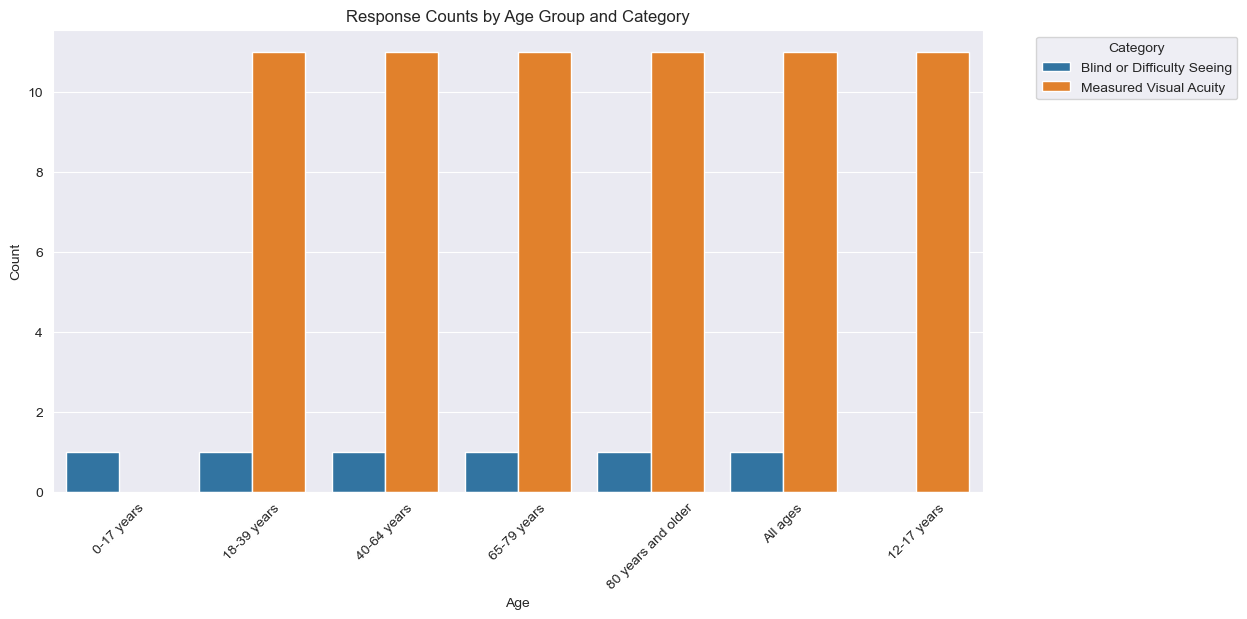

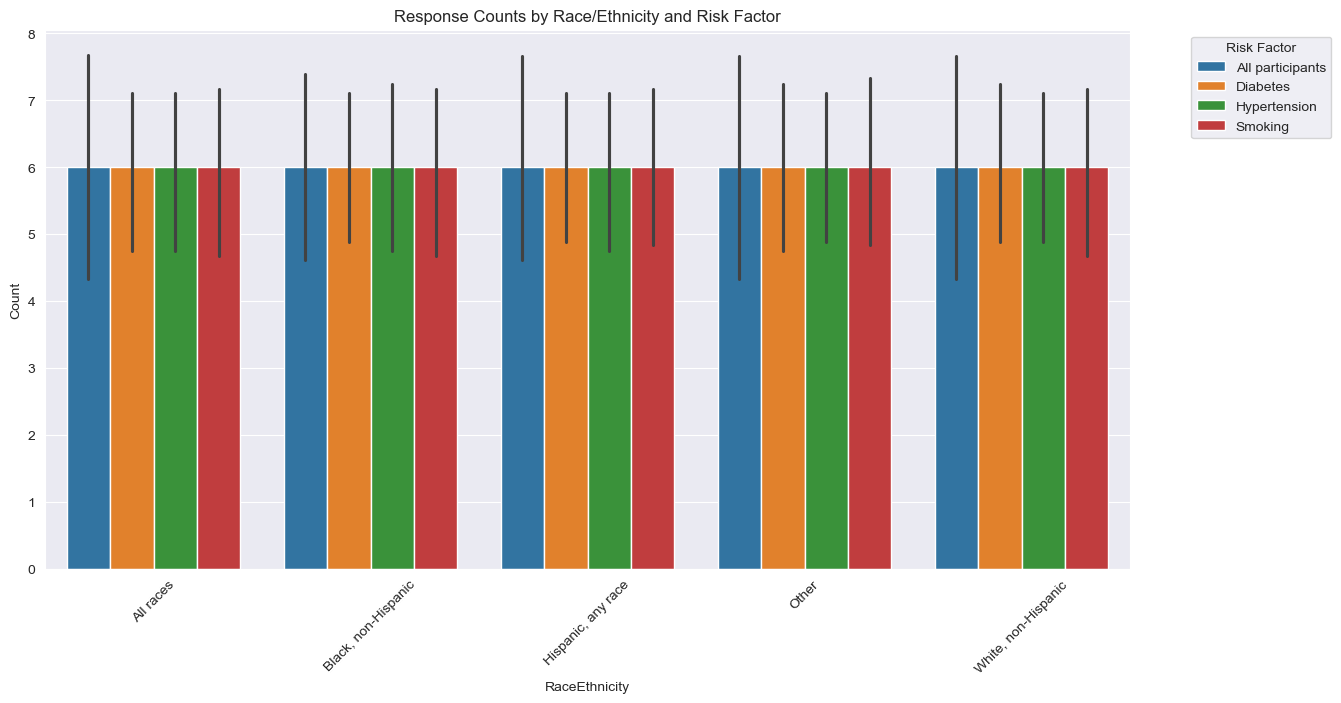

Percentage Table:


0       0.166667
1       0.166667
2       0.166667
3       0.166667
4       0.166667
          ...   
1195    0.166667
1196    0.166667
1197    0.166667
1198    0.166667
1199    0.166667
Length: 1200, dtype: float64


Correlation Table:


Category,RiskFactor,RiskFactorResponse_Encoded,Blind or Difficulty Seeing,Measured Visual Acuity
0,All participants,0,1.0,0.181818
1,Diabetes,0,1.0,0.181818
2,Diabetes,1,1.0,0.181818
3,Hypertension,0,1.0,0.181818
4,Hypertension,1,1.0,0.181818
5,Smoking,0,1.0,0.181818
6,Smoking,1,1.0,0.181818



Summary Table:


,Category,Age,Gender,RaceEthnicity,RiskFactor,RiskFactorResponse,Count
0,Blind or Difficulty Seeing,0-17 years,All genders,All races,All participants,Total,1
1,Blind or Difficulty Seeing,0-17 years,All genders,All races,Diabetes,No,1
2,Blind or Difficulty Seeing,0-17 years,All genders,All races,Diabetes,Yes,1
3,Blind or Difficulty Seeing,0-17 years,All genders,All races,Hypertension,No,1
4,Blind or Difficulty Seeing,0-17 years,All genders,All races,Hypertension,Yes,1
...,...,...,...,...,...,...,...
1195,Measured Visual Acuity,All ages,Male,"White, non-Hispanic",Diabetes,Yes,11
1196,Measured Visual Acuity,All ages,Male,"White, non-Hispanic",Hypertension,No,11
1197,Measured Visual Acuity,All ages,Male,"White, non-Hispanic",Hypertension,Yes,11
1198,Measured Visual Acuity,All ages,Male,"White, non-Hispanic",Smoking,No,11


In [80]:
summary_table = df.groupby(['Category', 'Age', 'Gender', 'RaceEthnicity', 'RiskFactor', 'RiskFactorResponse']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(data=summary_table, x='Age', y='Count', hue='Category')
plt.title("Response Counts by Age Group and Category")
plt.xticks(rotation=45)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Additional barplot showing responses by Race and RiskFactor
plt.figure(figsize=(14, 7))
sns.barplot(data=summary_table, x='RaceEthnicity', y='Count', hue='RiskFactor')
plt.title("Response Counts by Race/Ethnicity and Risk Factor")
plt.xticks(rotation=45)
plt.legend(title="Risk Factor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Display all tables
print("Percentage Table:")
display(percent_table)
print("\nCorrelation Table:")
display(correlation_table)
print("\nSummary Table:")
display(summary_table)

## Print Cleaned Data

In [64]:
df.head()

,Category,Question,Response,Age,Gender,RaceEthnicity,RiskFactor,RiskFactorResponse
0,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,All ages,Female,All races,Diabetes,No
1,Measured Visual Acuity,Best-corrected visual acuity,Visual impairment,40-64 years,All genders,Other,Smoking,Yes
2,Measured Visual Acuity,Best-corrected visual acuity,US-defined blindness,12-17 years,Male,Other,Diabetes,No
3,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,All ages,Female,Other,Diabetes,Yes
4,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,18-39 years,Female,"Black, non-Hispanic",Diabetes,No


### Unique Questions

In [65]:
df["Question"].unique()

array(['Percentage of people blind in both eyes',
       'Best-corrected visual acuity', 'Presenting visual acuity',
       'Uncorrected Refractive Error (URE)'], dtype=object)

### Unique Answers to "Presenting visual acuity"

In [66]:
presenting_visual_acuity = df[df['Question'] == 'Presenting visual acuity']['Response'].unique()

### Unique Answers to "Best-corrected visual acuity"

In [67]:
best_corrected_visual_acuity = df[df['Question'] == 'Best-corrected visual acuity']['Response'].unique()

### Save Cleaned Data

In [68]:
df.to_csv(r'data/Vision_Survey_Cleaned.csv', header=True, index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7200 entries, 0 to 10319
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Category            7200 non-null   object
 1   Question            7200 non-null   object
 2   Response            7200 non-null   object
 3   Age                 7200 non-null   object
 4   Gender              7200 non-null   object
 5   RaceEthnicity       7200 non-null   object
 6   RiskFactor          7200 non-null   object
 7   RiskFactorResponse  7200 non-null   object
dtypes: object(8)
memory usage: 506.2+ KB


### Data Visualization
* Age Distribution of People that smokes
* Age Distribution of People that have Diabetes
* Age Distribution of People that have Hypertension

## Distribution of People that smokes

Text(0.5, 1.0, 'Age Distribution of Smokers')

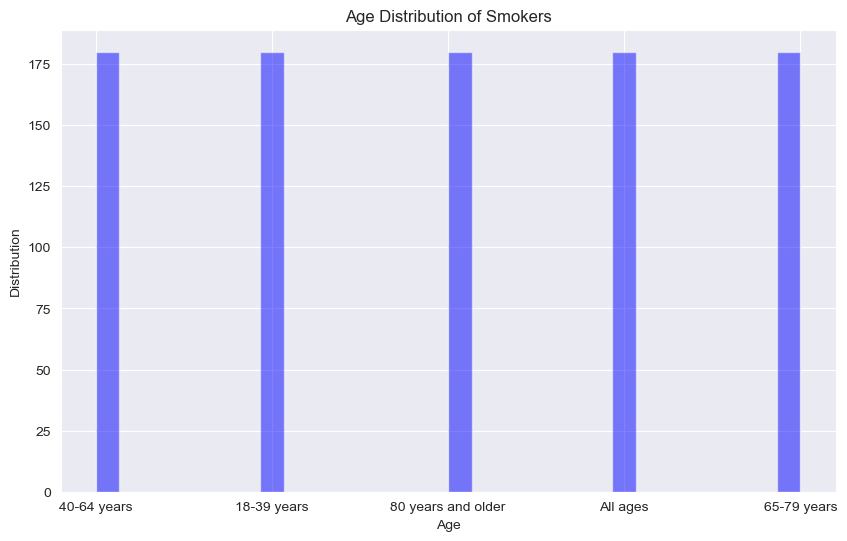

In [69]:
plt.figure(figsize=(10, 6))
plt.hist(df[( df['RiskFactor'] == 'Smoking') & ( df['RiskFactorResponse'] == 'Yes')]['Age'], bins=30, color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Age Distribution of Smokers')

Age Distribution of People that have Diabetes

Text(0.5, 1.0, 'Age Distribution of Diabetes')

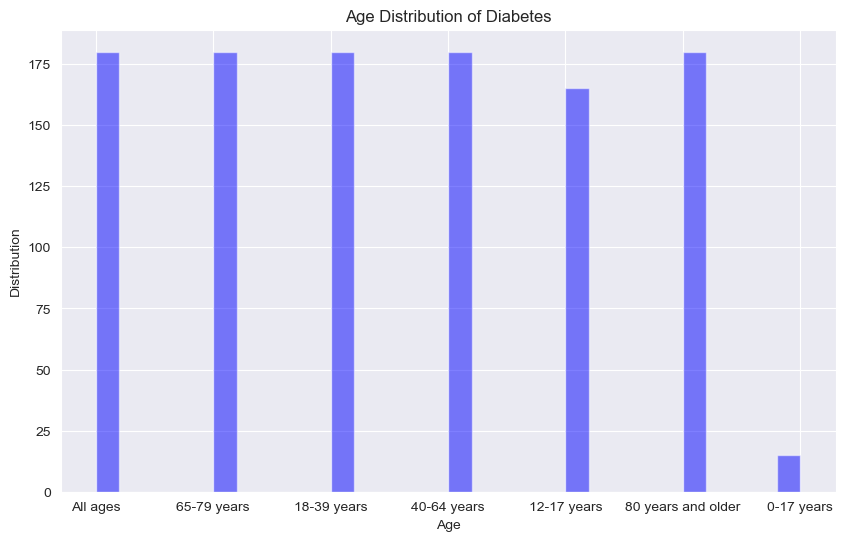

In [70]:
plt.figure(figsize=(10, 6))
plt.hist(df[( df['RiskFactor'] == 'Diabetes') & ( df['RiskFactorResponse'] == 'Yes')]['Age'], bins=30, color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Age Distribution of Diabetes')

### Age Distribution of People that have Hypertension

Text(0.5, 1.0, 'Age Distribution of Hypertension')

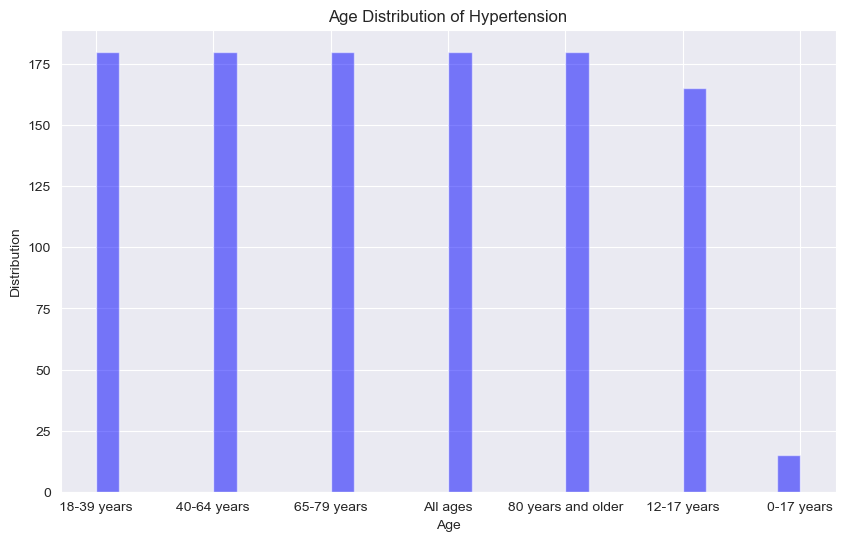

In [71]:
plt.figure(figsize=(10, 6))
plt.hist(df[( df['RiskFactor'] == 'Hypertension') & ( df['RiskFactorResponse'] == 'Yes')]['Age'], bins=30, color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Age Distribution of Hypertension')

### Percentage of Males that smokes, have Diabetes and have Hypertension


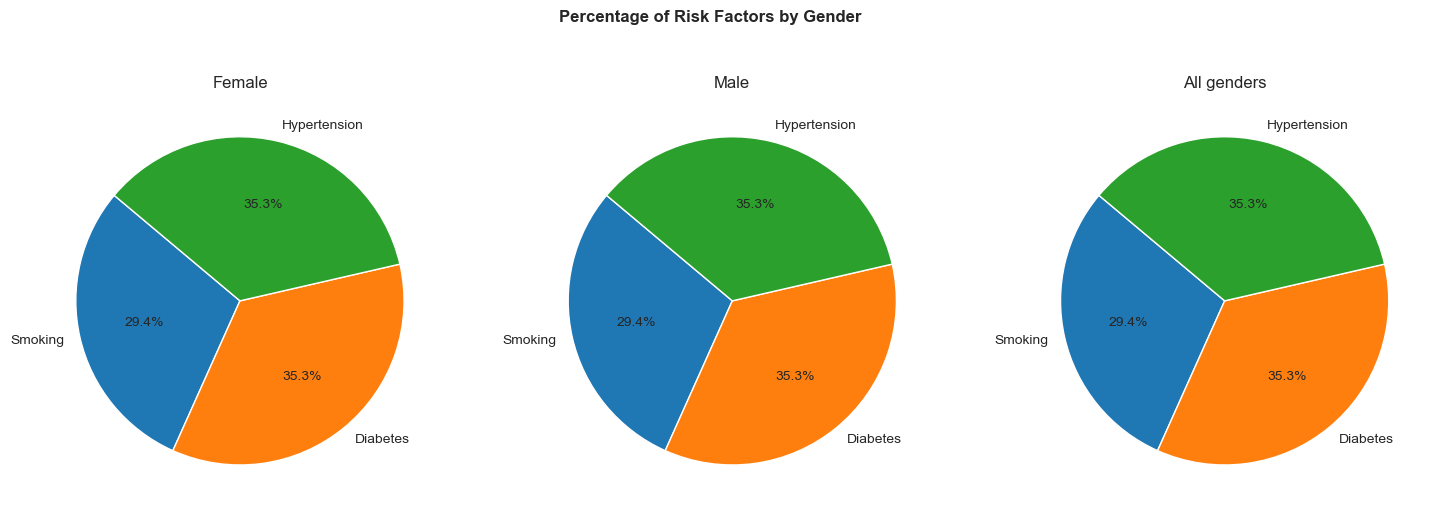

In [72]:
genders = ['Female', 'Male', 'All genders']
risk_factors = ['Smoking', 'Diabetes', 'Hypertension']

# Dictionary to store data for pie charts
risk_counts_by_gender = {gender: {risk: 0 for risk in risk_factors} for gender in genders}
total_counts_by_gender = {gender: 0 for gender in genders}

# Calculate counts for each gender and risk factor
for gender in genders:
    total_counts_by_gender[gender] = df[(df['Gender'] == gender)].shape[0]
    for risk in risk_factors:
        risk_counts_by_gender[gender][risk] = df[(df['Gender'] == gender) & (df['RiskFactor'] == risk) & (df['RiskFactorResponse'] == 'Yes')].shape[0]

# Calculate percentages for each gender and risk factor
percentages_by_gender = {gender: {risk: (risk_counts_by_gender[gender][risk] / total_counts_by_gender[gender]) * 100 for risk in risk_factors} for gender in genders}

# Create pie charts for each gender
fig, axes = plt.subplots(nrows=1, ncols=len(genders), figsize=(18, 6))
fig.suptitle('Percentage of Risk Factors by Gender', fontweight='bold')

for idx, gender in enumerate(genders):
    axes[idx].pie(percentages_by_gender[gender].values(), labels=percentages_by_gender[gender].keys(), autopct='%1.1f%%', startangle=140)
    axes[idx].set_title(f'{gender}')

plt.show()

### Merged Data Visualization from above

* How many smokers have Diabetes and Hypertension
* How many people with Diabetes have Hypertension
* How many have Diabetes and Hypertension



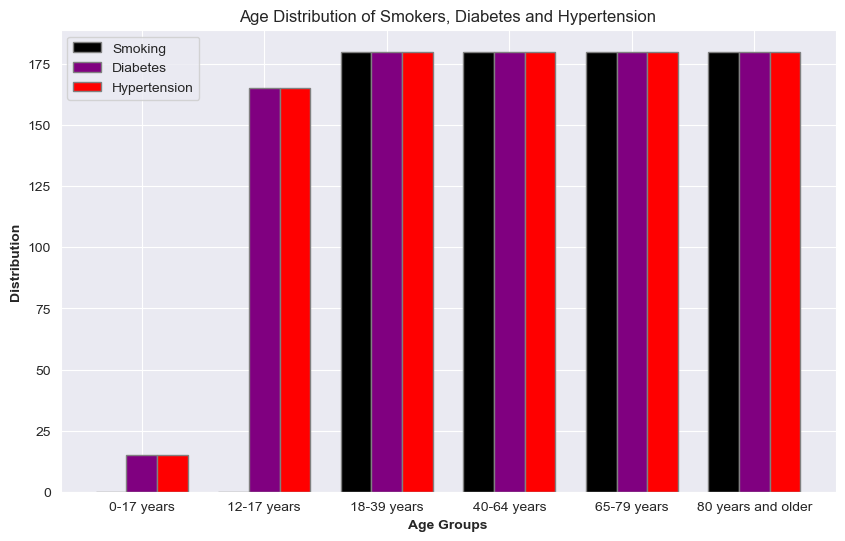

In [73]:
# Age Groups
age_groups = ['0-17 years', '12-17 years', '18-39 years', '40-64 years', '65-79 years', '80 years and older']

# Count of each Risk Factor based on Age Group
smoking_counts = [df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Smoking') & (df['RiskFactorResponse'] == 'Yes')].shape[0] for age_group in age_groups]
diabetes_counts = [df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Diabetes') & (df['RiskFactorResponse'] == 'Yes')].shape[0] for age_group in age_groups]
hypertension_counts = [df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Hypertension') & (df['RiskFactorResponse'] == 'Yes')].shape[0] for age_group in age_groups]

# Plotting the Bar Graph Calculate the width of the bars and the spacing between them
bar_width = 0.25
r1 = np.arange(len(age_groups))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Set the bars next to each other
plt.figure(figsize=(10, 6))
plt.bar(r1, smoking_counts, color='black', width=bar_width, edgecolor='grey', label='Smoking')
plt.bar(r2, diabetes_counts, color='purple', width=bar_width, edgecolor='grey', label='Diabetes')
plt.bar(r3, hypertension_counts, color='red', width=bar_width, edgecolor='grey', label='Hypertension')

# Adding Labels and Title
plt.xlabel('Age Groups', fontweight='bold')
plt.ylabel('Distribution', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(age_groups))], age_groups)
plt.title('Age Distribution of Smokers, Diabetes and Hypertension')

plt.legend()
plt.show()

### Testing

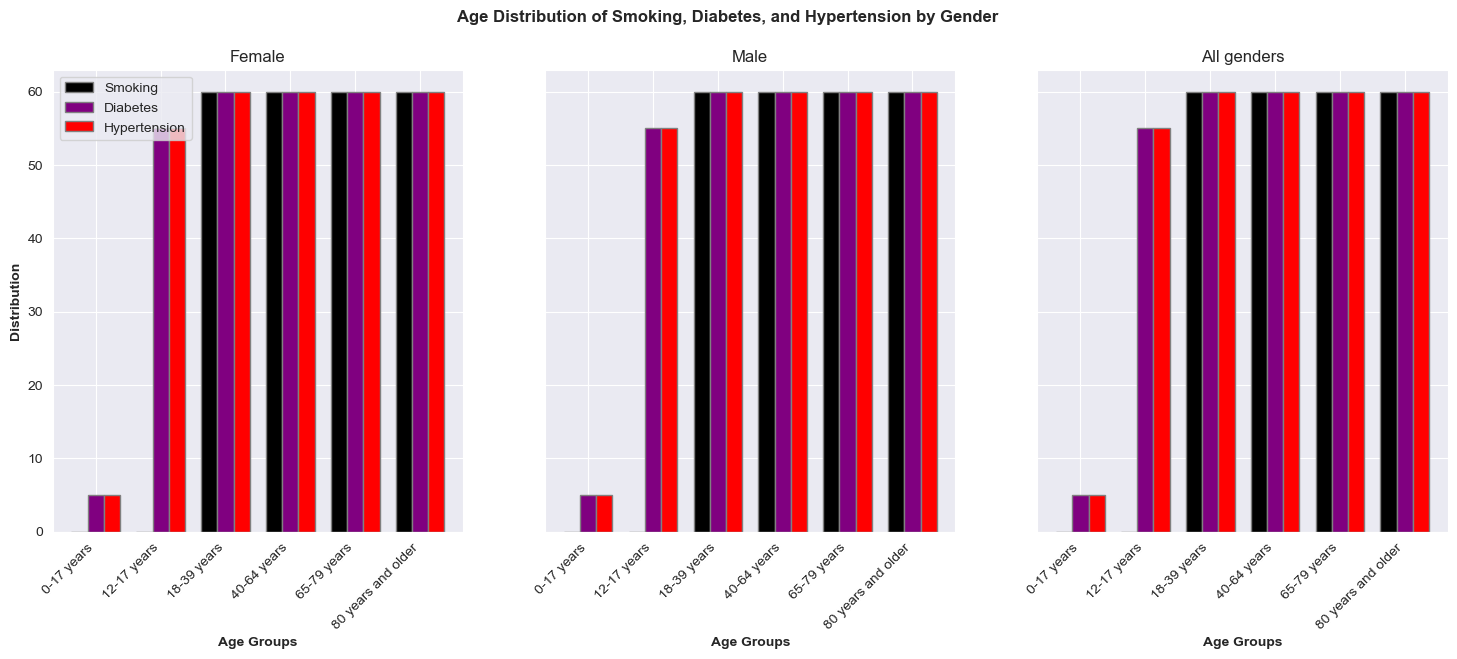

In [74]:
genders = ['Female', 'Male', 'All genders']
risk_factors = ['Smoking', 'Diabetes', 'Hypertension']

# Dictionary to store data for subplots
risk_counts_by_gender = {gender: {'Smoking': [], 'Diabetes': [], 'Hypertension': []} for gender in genders}

# Get Bar height for each Age Group based on the gender
for gender in genders:
    for age_group in age_groups:
        smoking_count = df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Smoking') & (df['Gender'] == gender) & (df['RiskFactorResponse'] == 'Yes')].shape[0]
        diabetes_count = df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Diabetes') & (df['Gender'] == gender) & (df['RiskFactorResponse'] == 'Yes')].shape[0]
        hypertension_count = df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Hypertension') & (df['Gender'] == gender) & (df['RiskFactorResponse'] == 'Yes')].shape[0]
        
        risk_counts_by_gender[gender]['Smoking'].append(smoking_count)
        risk_counts_by_gender[gender]['Diabetes'].append(diabetes_count)
        risk_counts_by_gender[gender]['Hypertension'].append(hypertension_count)

fig, axes = plt.subplots(nrows=1, ncols=len(genders), figsize=(18, 6), sharey=True)
fig.suptitle('Age Distribution of Smoking, Diabetes, and Hypertension by Gender', fontweight='bold')

for idx, gender in enumerate(genders):
    r1 = np.arange(len(age_groups))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    
    axes[idx].bar(r1, risk_counts_by_gender[gender]['Smoking'], color='black', width=bar_width, edgecolor='grey', label='Smoking')
    axes[idx].bar(r2, risk_counts_by_gender[gender]['Diabetes'], color='purple', width=bar_width, edgecolor='grey', label='Diabetes')
    axes[idx].bar(r3, risk_counts_by_gender[gender]['Hypertension'], color='red', width=bar_width, edgecolor='grey', label='Hypertension')
    
    axes[idx].set_xlabel('Age Groups', fontweight='bold')
    axes[idx].set_xticks([r + bar_width for r in range(len(age_groups))])
    axes[idx].set_xticklabels(age_groups, rotation=45, ha='right')
    axes[idx].set_title(f'{gender}')
    
axes[0].set_ylabel('Distribution', fontweight='bold')
axes[0].legend(loc='upper left')

plt.show()

### Distribution of the Vision Status of People that Smokes, have Diabetes and have Hypertension based on Gender based on the question "Presenting visual acuity"

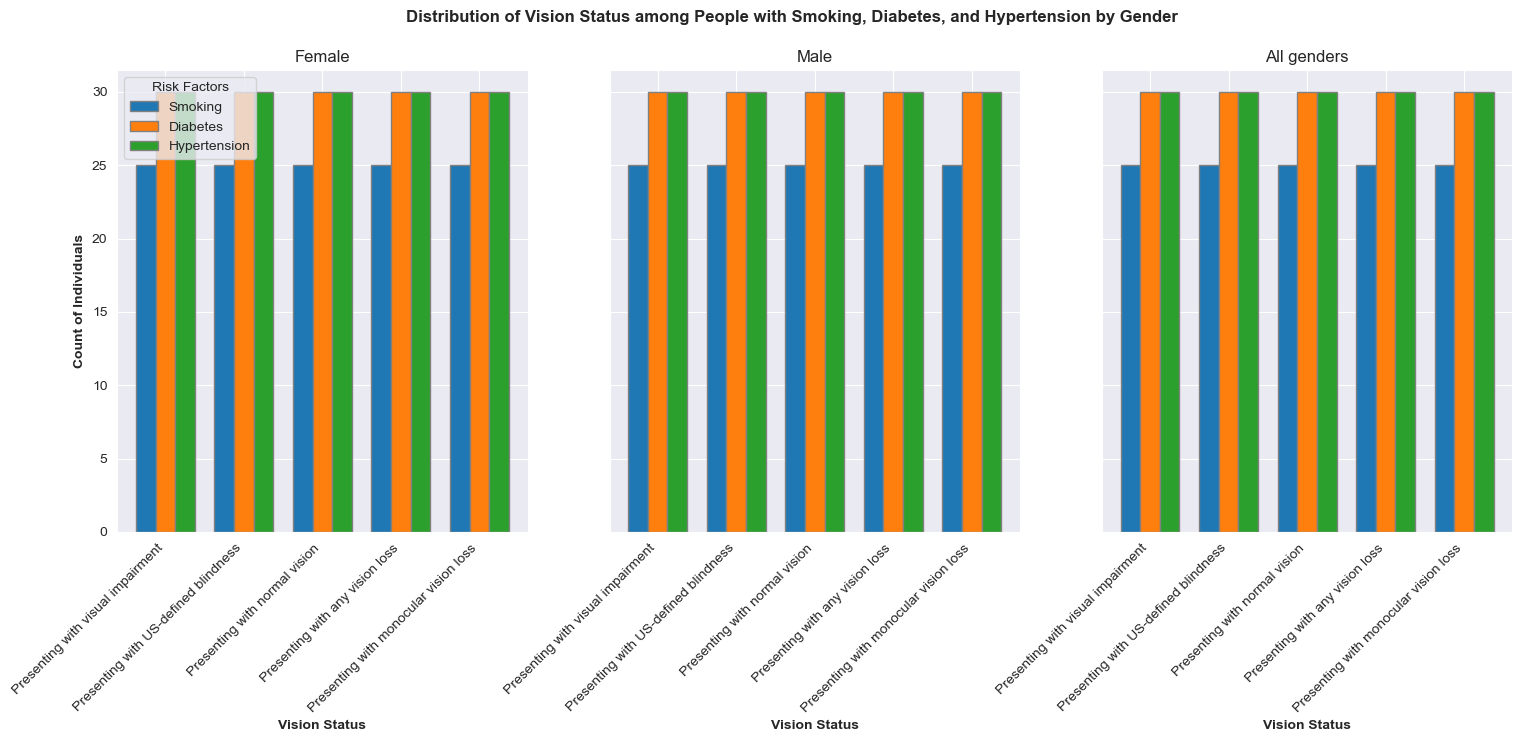

In [75]:
vision_risk_counts_by_gender = {gender: {risk: {status: 0 for status in presenting_visual_acuity} for risk in risk_factors} for gender in genders}

for gender in genders:
    for risk in risk_factors:
        for status in presenting_visual_acuity:
            count = df[
                (df['Gender'] == gender) &
                (df['RiskFactor'] == risk) &
                (df['Question'] == 'Presenting visual acuity') &
                (df['Response'] == status) & 
                (df['RiskFactorResponse'] == 'Yes')
            ].shape[0]
            vision_risk_counts_by_gender[gender][risk][status] = count

fig, axes = plt.subplots(nrows=1, ncols=len(genders), figsize=(18, 6), sharey=True)
fig.suptitle('Distribution of Vision Status among People with Smoking, Diabetes, and Hypertension by Gender', fontweight='bold')

for idx, gender in enumerate(genders):
    r = [np.arange(len(presenting_visual_acuity)) + bar_width * i for i in range(len(risk_factors))]
    for i, risk in enumerate(risk_factors):
        axes[idx].bar(r[i], [vision_risk_counts_by_gender[gender][risk][status] for status in presenting_visual_acuity], 
                      width=bar_width, edgecolor='grey', label=risk)
    
    axes[idx].set_xlabel('Vision Status', fontweight='bold')
    axes[idx].set_xticks([pos + bar_width for pos in range(len(presenting_visual_acuity))])
    axes[idx].set_xticklabels(presenting_visual_acuity, rotation=45, ha='right')
    axes[idx].set_title(f'{gender}')

axes[0].set_ylabel('Count of Individuals', fontweight='bold')
axes[0].legend(loc='upper left', title='Risk Factors')

plt.show()

In [76]:
df[(df['Gender'] == 'Male') &
   (df['RiskFactor'] == 'Smoking') &
   (df['Category'] == 'Measured Visual Acuity') &
   (df['RiskFactorResponse'] == 'Yes')]

,Category,Question,Response,Age,Gender,RaceEthnicity,RiskFactor,RiskFactorResponse
55,Measured Visual Acuity,Presenting visual acuity,Presenting with normal vision,40-64 years,Male,Other,Smoking,Yes
61,Measured Visual Acuity,Uncorrected Refractive Error (URE),Uncorrected refractive error (URE),18-39 years,Male,All races,Smoking,Yes
66,Measured Visual Acuity,Presenting visual acuity,Presenting with visual impairment,80 years and older,Male,"Hispanic, any race",Smoking,Yes
94,Measured Visual Acuity,Presenting visual acuity,Presenting with monocular vision loss,40-64 years,Male,"Hispanic, any race",Smoking,Yes
106,Measured Visual Acuity,Presenting visual acuity,Presenting with any vision loss,18-39 years,Male,"Hispanic, any race",Smoking,Yes
...,...,...,...,...,...,...,...,...
10155,Measured Visual Acuity,Uncorrected Refractive Error (URE),Uncorrected refractive error (URE),All ages,Male,"White, non-Hispanic",Smoking,Yes
10162,Measured Visual Acuity,Uncorrected Refractive Error (URE),Uncorrected refractive error (URE),18-39 years,Male,Other,Smoking,Yes
10220,Measured Visual Acuity,Presenting visual acuity,Presenting with any vision loss,All ages,Male,"Black, non-Hispanic",Smoking,Yes
10223,Measured Visual Acuity,Presenting visual acuity,Presenting with US-defined blindness,18-39 years,Male,"White, non-Hispanic",Smoking,Yes


### Distribution of the Vision Status of People that Smokes, have Diabetes and have Hypertension based on Gender based on the question "Best-corrected visual acuity"

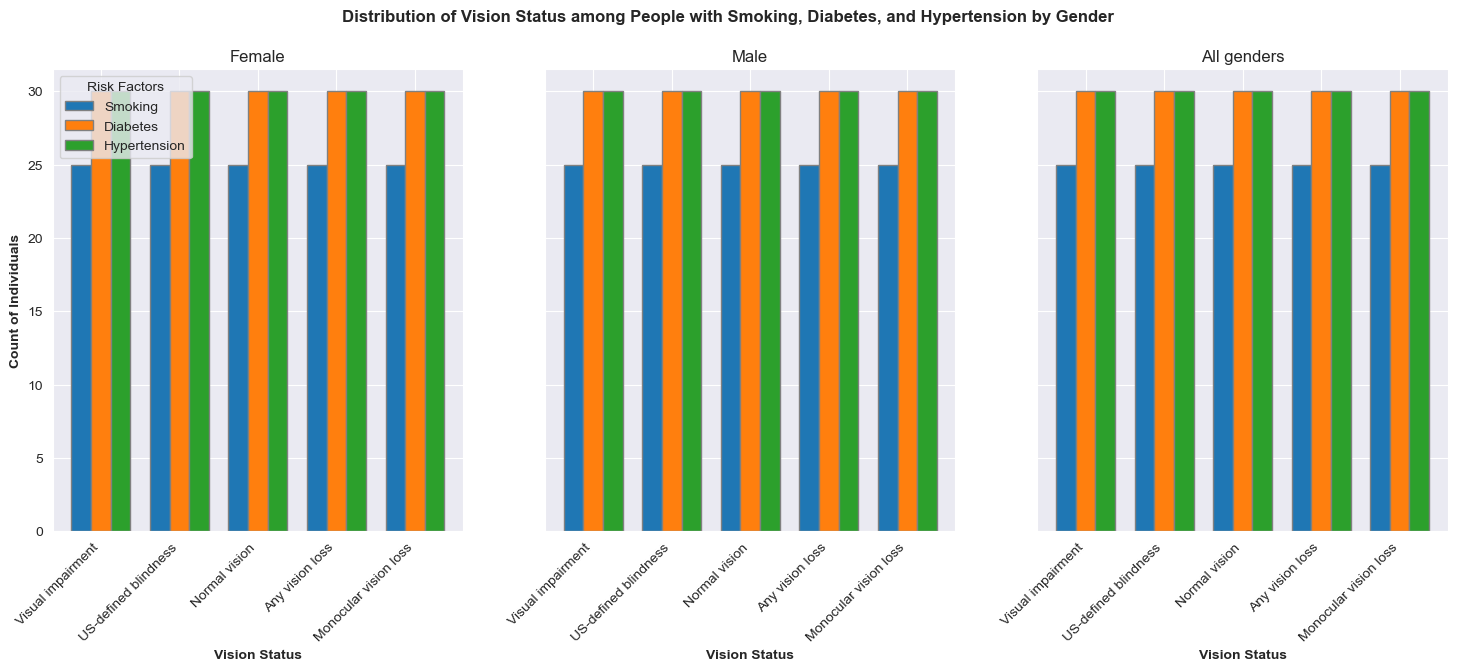

In [77]:
vision_risk_counts_by_gender = {gender: {risk: {status: 0 for status in best_corrected_visual_acuity} for risk in risk_factors} for gender in genders}

for gender in genders:
    for risk in risk_factors:
        for status in best_corrected_visual_acuity:
            count = df[
                (df['Gender'] == gender) &
                (df['RiskFactor'] == risk) &
                (df['Question'] == 'Best-corrected visual acuity') &
                (df['Response'] == status) & 
                (df['RiskFactorResponse'] == 'Yes')
            ].shape[0]
            vision_risk_counts_by_gender[gender][risk][status] = count

fig, axes = plt.subplots(nrows=1, ncols=len(genders), figsize=(18, 6), sharey=True)
fig.suptitle('Distribution of Vision Status among People with Smoking, Diabetes, and Hypertension by Gender', fontweight='bold')

for idx, gender in enumerate(genders):
    r = [np.arange(len(best_corrected_visual_acuity)) + bar_width * i for i in range(len(risk_factors))]
    for i, risk in enumerate(risk_factors):
        axes[idx].bar(r[i], [vision_risk_counts_by_gender[gender][risk][status] for status in best_corrected_visual_acuity], 
                      width=bar_width, edgecolor='grey', label=risk)
    
    axes[idx].set_xlabel('Vision Status', fontweight='bold')
    axes[idx].set_xticks([pos + bar_width for pos in range(len(best_corrected_visual_acuity))])
    axes[idx].set_xticklabels(best_corrected_visual_acuity, rotation=45, ha='right')
    axes[idx].set_title(f'{gender}')

axes[0].set_ylabel('Count of Individuals', fontweight='bold')
axes[0].legend(loc='upper left', title='Risk Factors')

plt.show()

### Patterns 

* Every Vision Status has the same amount of people 